In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from wordcloud import WordCloud 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,  classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
from sklearn.model_selection import GridSearchCV

In [2]:
data = pd.read_excel('C:\\Users\\Admin\\Desktop\\nlp research\\proj data\\course_list.xlsx')

In [3]:

data.shape

(1398, 2)

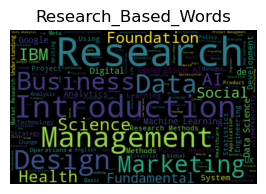

In [4]:
#research_based_words
res_text = ' '.join( 
    data['course'][data['r_val'] == 1].tolist()) 
wordcloud = WordCloud(width=400, height=250, 
                      background_color='black').generate(res_text) 
plt.figure(figsize=(5, 2)) 
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis('off') 
plt.title('Research_Based_Words') 
plt.savefig('res_words.jpg')
plt.show() 

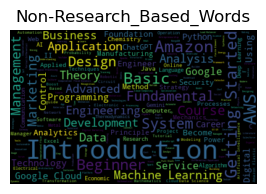

In [5]:
#non-research_based_words
nres_text = ' '.join( 
    data['course'][data['r_val'] == 0].tolist()) 
wordcloud = WordCloud(width=400, height=250, 
                      background_color='black').generate(nres_text) 
plt.figure(figsize=(5, 2)) 
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis('off') 
plt.title('Non-Research_Based_Words') 
plt.savefig('non-res_words.jpg')
plt.show()

In [58]:
#pipeline_creation
tf_idf = TfidfVectorizer(stop_words = 'english', ngram_range = (1, 2), max_features = 1400)

x_tr, x_ts, y_tr, y_ts = train_test_split(data['course'], data['r_val'], test_size = 0.3)
logit = LogisticRegression(C = 1, penalty = 'l2', solver = 'lbfgs', random_state = 55)
#param_grid_nb = {"C": [0.1, 1, 5], "solver": ['lbfgs', 'liblinear'] }
#nbModel_grid = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=2)
#nbModel_grid.fit(x_tr, y_tr)
#print(nbModel_grid.best_estimator_)
pipe = Pipeline([('tf_idf', tf_idf), ('logit', logit)])
pipe.fit(x_tr, y_tr)

Pipeline(steps=[('tf_idf',
                 TfidfVectorizer(max_features=1400, ngram_range=(1, 2),
                                 stop_words='english')),
                ('logit', LogisticRegression(C=1, random_state=55))])

In [59]:
y_pred = pipe.predict(x_ts)
#model_performance
acc = accuracy_score(y_ts, y_pred)
clas = classification_report(y_ts, y_pred)
cm = confusion_matrix(y_ts, y_pred)

print('accuracy: \n', round(acc,3)*100, '%')
print("report: \n",clas)
print("confusion_matrix: \n", cm)

accuracy: 
 76.7 %
report: 
               precision    recall  f1-score   support

           0       0.76      0.87      0.81       238
           1       0.78      0.64      0.70       182

    accuracy                           0.77       420
   macro avg       0.77      0.75      0.76       420
weighted avg       0.77      0.77      0.76       420

confusion_matrix: 
 [[206  32]
 [ 66 116]]


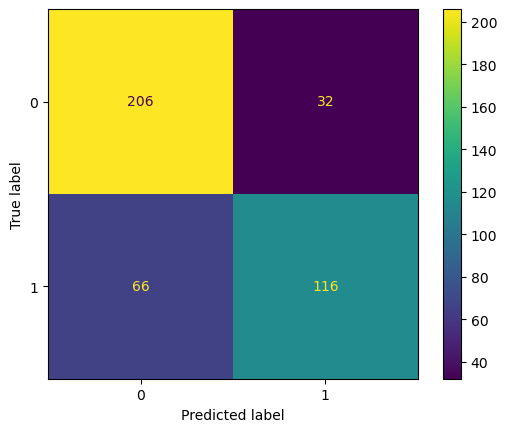

In [60]:
#visual_representation
cm_disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])
cm_disp.plot()
plt.savefig('conf_matrx.jpg')
plt.show()

In [61]:
import pickle
pkl_file = "log_reg_model.pkl"  

with open(pkl_file, 'wb') as file:  
    pickle.dump(pipe, file)


In [64]:
x = pickle.dumps(x_tr)
y = pickle.dumps(y_tr)
xs = pickle.dumps(x_ts)
ys = pickle.dumps(y_ts)

In [66]:
#print(classification_report(y_ts, y_pre)) 

In [79]:
# load model from pickle file
with open(pkl_file, 'rb') as file:  
    model = pickle.load(file) 
def test(l_ts):
    y_pre = model.predict(l_ts)
    return y_pre

l_ts = []
sent = input("enter the course name: ")
l_ts.append(sent)
val = test(l_ts)
for pred in val:
    if pred:
        print("research_based_course")
    else:
        print("non-research_based_course")
    

#print(classification_report(y_ts, y_pre)) 

enter the course name: introduction to qualitative research
research_based_course
